<a href="https://colab.research.google.com/github/akmalakka/ZombieGun/blob/master/SE03_DqLab_PySQL_DataViz_Meet_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Meet Up 2 - Data Visualization with Plotly**
#### By : <font color='red'>Anton Suhartono</font>

In this practice you will learn:
* How to Manipulate data using Python
* How to Manipulate data using SQL
* Create Basic Plot with Plotly
* Study Case

### **Key Takeaways**
1. Prepare the data
2. Graph with Plotly Express High-level Interface
3. Customize your graphs with Plotly Graph_Objects, using figure update
* update_traces
* update_layout
* update_annotations
* update_yaxes
* update_xaxes

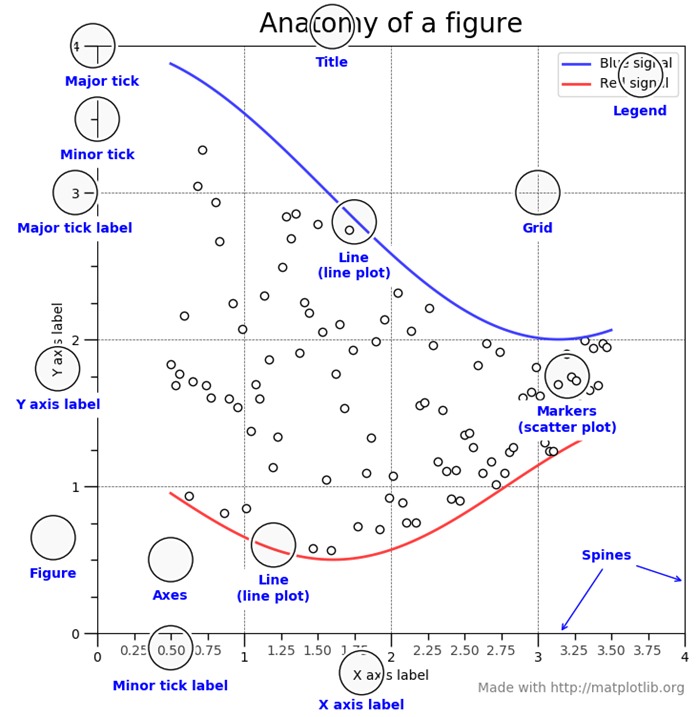

### <font color='darkred'>A. Library Used</font>

* `pandas` is a Python library used for working with data sets. It has functions for analyzing, cleaning, exploring, and manipulating data.
* `pandasql` allows you to query pandas DataFrames using SQL syntax. It works similarly to sqldf in R .
* `plotly` is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical visualization

In [ ]:
# A.1 installing package


In [ ]:
# Library data manipulation


# Library Data Visualization



### <font color='darkred'>B. Dataset</font>

Berikut ini tampilan data transaksi supermarket kita sepanjang tahun 2019, lengkap dengan masing-masing penjelasannya untuk tiap kolom.
* `order_id` : ID dari order/transaksi, 1 transaksi bisa terdiri dari beberapa produk, tetapi hanya dilakukan oleh 1 customer
* `order_date` : tanggal terjadinya transaksi
* `customer_id` : ID dari pembeli, bisa jadi dalam satu hari, 1 customer melakukan transaksi beberapa kali
* `city` : kota tempat toko terjadinya transaksi
* `province` : provinsi (berdasarkan city)
* `product_id` : ID dari suatu product yang dibeli
* `brand` : brand/merk dari product. Suatu product yang sama pasti memiliki brand yang sama
* `quantity` : Kuantitas/banyaknya product yang dibeli
* `item_price` : Harga dari 1 product (dalam Rupiah). Suatu product yang sama, bisa jadi memiliki harga yang berbeda saat dibeli


location data:
https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv

### <font color='darkred'>C. Plotting with Plotly</font>

--------------------------------------------------
***Workflow:***
1. Import Package
2. Prepare the Data
3. Creating plot
4. Show Plot
--------------------------------------------------

#### <font color='darkgreen'>C.1 Case Study 1</font>

Tampilkan GMV dari bulan ke bulannya. Dimana GMV didapat dari perkalian antara `item_price` & `quantity`

<details><summary>Click here for the Hints</summary>

* Buat kolom baru format bulan saja
* Buat kolom baru GMV
* Totalkan GMV berdasarkan bulan, buat dataframe baru
* Plot menggunakan line chart

</details>

In [ ]:
#Create dataframe stored as monthly_agg_df


<details><summary>Data Preparation Using SQL</summary>

```python
# penambahahan variable GMV using SQL
dataset = ps.sqldf("""
                   select *, item_price*quantity as gmv
                   from dataset
                """)
dataset.head()

# penambahan variable month using SQL
dataset = ps.sqldf("""
                   select *, substr(order_date,1,7) as order_month
                   from dataset
                    """)
dataset.head()


# buat dataframe baru untuk line chart
monthly_agg_df = ps.sqldf("""
                           select order_month, sum(gmv) as gmv
                           from dataset
                           group by order_month
                        """)
monthly_agg_df.head()
```

</details>

##### C.1.1 Using Object Go

In [ ]:
# create plot



# show plot



##### C.1.2 Using Express

--------------------------------------------------
***Common Used:***
```python
fig = px.chart_type(df, parameters)
fig.update_layout(layout_parameters or add annotations)
fig.update_traces(further graph parameters)
fig.update_xaxes() # or update_yaxes
fig.show()
```

--------------------------------------------------


In [ ]:
# create plot


# Show Plot



###### C.1.3 Update X & Y label

In [ ]:
# create plot




# Show Plot



###### C.1.4 Custom X & Y Ticks

In [ ]:
# create plot




# Show Plot



###### C.1.5 Styling grid lines

In [ ]:
# create plot


# update Modify Grid


# Show Plot



###### C.1.6 Custom Line & Marker

In [ ]:
# create plot



# Show Plot



###### C.1.7 Custom Title

In [ ]:
# create plot




# Show Plot



###### C.1.8 Custom Annotation

In [ ]:
# create plot



# Show Plot



###### C.1.9 Custom Range Layout

In [ ]:
# create plot


# Select Range


# Show Plot



###### C.1.10 Custom Background

In [ ]:
# create plot


# Update Background


# Show Plot



#### <font color='darkgreen'>C.2 Case Study 2</font>

Tampilkan GMV dari bulan ke bulannya untuk kota-kota yang ada di provinsi Jawa Tengah & Jawa Timur

<details><summary>Click here for the Hints</summary>

* Filter berdasarkan Provinsi Jawa tengah & Jawa Timur
* Totalkan GMV (grouping) berdasarkan bulan & kota, buat dataframe baru
* Plot menggunakan Multiline chart

</details>

In [ ]:
# Using SQL




<details><summary>Data Preparation Using Python</summary>

```python
# buat dataframe baru untuk MultiLine chart
monthly_agg_city_df = dataset[(dataset["province"] == "Jawa Timur") | (dataset["province"] == "Jawa Tengah")]
monthly_agg_city_df = monthly_agg_city_df.groupby(["order_month","city"])["gmv"].sum().reset_index()
monthly_agg_city_df.head()
```

</details>

In [ ]:
# create plot


# Show Plot



#### <font color='darkgreen'>C.3 Case Study 3</font>

Tampilkan komposisi dari kota penyumbang GMV terbesar di provinsi jawa tengah & Jawa Timur

<details><summary>Click here for the Hints</summary>

* Filter yang daerah jawa tengah & Jawa timur 
* Total GMV berdasakan kota
* Buat Dataframe nya

* Plot menggunakan pie chart

</details>

In [ ]:
# Create dataframe stored as agg_city_df



In [ ]:
# Create plot






# Show Plot



#### <font color='darkgreen'>C.4 Case Study 4</font>

Diasumsikan quantity dari transaksi per customer sangat mempengaruhi dengan besarnya GMV yang dihasilkan. Apakah benar ?

<details><summary>Click here for the Hints</summary>

* Grup kan berdasarkan customer_id, hitung total gmv nya & total quantitynya
* Buat Dataframe nya
* Plot menggunakan scatter plot dan line plot untuk bantu polanya

</details>

In [ ]:
# Create dataframe stored as dataset_customer




In [ ]:
# Create Scatter Plot



# Show Plot



### <font color='darkred'>D. FINISH !!!</font>

#### <font color='darkgreen'>D.1 Documentation</font>

For more information:
* [Plotly Docs Express Chart Reference](https://plotly.com/python-api-reference/plotly.express.html)
* [Plotly Docs Axes](https://plotly.com/python/axes/#tick-placement-color-and-style)
* [Plotly Docs Layout](https://plotly.com/python/reference/layout/)
* [Plotly Docs Update traces](https://plotly.com/python/creating-and-updating-figures/)
* [Plotly Docs Annotation](https://plotly.com/python/reference/layout/annotations/)
* [Plotly Docs Template](https://plotly.com/python/templates/)
* [Plotly Docs Hover](https://plotly.com/python/hover-text-and-formatting/)


#### <font color='darkgreen'>D2. FAQ</font>

 1. Jupyter notebook cant show the chart of plotly

* Check the extension plotly in Jupyter with `jupyter labextension list` in terminal
* Run `jupyter labextension install jupyterlab-plotly` if haven't
* Restart jupyter program

2. line() got an unexpected keyword argument. -> 
U are using old version of package plotly (5.1 or older), reinstall to the newest

#### <font color='darkgreen'>D3. Need Help/Idea ?</font>



1.   [Plotly Fundamentals documentation](https://plotly.com/python/plotly-fundamentals/)
2.   [Plotly Forum](https://community.plotly.com/)
3.   [Color Palette](https://colorhunt.co/)